<a href="https://colab.research.google.com/github/nlee0212/EE4178/blob/master/Pytorch_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
a = 10
b = 1.2
print(a,b)
print(a+b,a-b,a*b,a/b)

10 1.2
11.2 8.8 12.0 8.333333333333334


In [2]:
quote = "Life is too short, "
print(quote, "You need Python")

Life is too short,  You need Python


In [3]:
quote = 'Life is too short, '
print(quote, "You need Python")

Life is too short,  You need Python


In [4]:
odd = [1,3,5,7,9]
alphabet = ["a", "b", "c"]
empty = []

In [5]:
odd[1]

3

In [6]:
print("odd[-1]: ",odd[-1])
print("odd[0:2]: ",odd[0:2]) 
# [0,2)

odd[-1]:  9
odd[0:2]:  [1, 3]


In [7]:
odd[0:0]

[]

In [8]:
odd[0:1]

[1]

In [9]:
alphabet.append("A")
alphabet.append(["B","c"])
alphabet

['a', 'b', 'c', 'A', ['B', 'c']]

In [10]:
empty.append(1)
empty.append(2)
empty.append('3')
empty

[1, 2, '3']

In [11]:
print(type(empty[0]))
print(type(empty[-1]))

<class 'int'>
<class 'str'>


In [12]:
dic = {'김철수': 80, '이영희': 90, "박아무개":85}
print(dic['김철수'])
print(dic.keys())
print(dic.values())

80
dict_keys(['김철수', '이영희', '박아무개'])
dict_values([80, 90, 85])


In [13]:
dic['이름'] = 100
dic

{'김철수': 80, '박아무개': 85, '이름': 100, '이영희': 90}

In [14]:
print('empty',empty)

if empty[1]%2 == 0:
  print("{} is an even number".format(empty[1]))
elif empty[1]%2 == 1:
  print("{} is an odd number".format(empty[1]))
else:
  print("Impossible")

empty [1, 2, '3']
2 is an even number


In [15]:
for i in range(5):
  print(i)

0
1
2
3
4


In [16]:
start = 0
while start < 5:
  print(start)
  start = start + 2

print("final value: {}".format(start))

0
2
4
final value: 6


In [17]:
def square_sum(a,b):
  squared_a = a**2
  squared_b = b**2

  return squared_a + squared_b

In [18]:
c = square_sum(3,4)
print("squared sum of {} and {} : {}".format(3,4,c))

squared sum of 3 and 4 : 25


In [19]:
class Calculator():
  def __init__(self):
    self.description = "Example for Initializaing a Class"
    self.result = 0

  def add(self, num1, num2):
    if type(num1) == int and type(num2) == int:
      result = num1 + num2
      return result
    else:
      raise Exception
  def mul(self,num1,num2):
    if type(num1) == int and type(num2) == int:
      result = num1*num2
      return result
    else:
      raise Exception

In [20]:
cal = Calculator()
print(cal.description)
print(cal.add(3,4))
print(cal.mul(3,4))

Example for Initializaing a Class
7
12


In [21]:
import numpy as np

array = np.array([1,2,3])
print(array,type(array))

[1 2 3] <class 'numpy.ndarray'>


(0.0, 10.0)

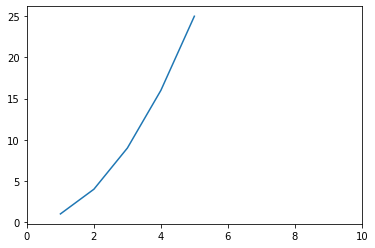

In [22]:
import matplotlib
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y = []

for i in x:
  y.append(i**2)

plt.plot(x,y)
plt.xlim(0,10)

# 1. Pytorch

## 1.1 Tensors/Numpy

In [23]:
import torch
import numpy as np

# colab의 경우, 대부분의 package install 필요 없음 (바로 import 가능)
# 패키지 설치가 필요한 경우 : 'pip install package_name'

Python List / Numpy / Tensors
- Python List: 행렬 연산을 위해 for문 사용
- Numpy: 차원이 다른 행렬 간에도 연산이 가능
- Tensor: GPU 상에서 연산이 가능하고 autograd(자동 미분)연산 기능이 있는 자료형

Tensor 생성 및 초기화

In [24]:
# 초기화되지 않은 행렬 생성
x = torch.empty(5,3)
print(x)

tensor([[3.0486e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 1.0718e-35]])


In [25]:
# 0~1 사이의 랜덤 초기화 행렬 생성
x = torch.rand(5,3)
print(x)

tensor([[0.2502, 0.9121, 0.5625],
        [0.6713, 0.5416, 0.1225],
        [0.8423, 0.3700, 0.6645],
        [0.5803, 0.7686, 0.5618],
        [0.7455, 0.8475, 0.5025]])


In [26]:
x.mean()

tensor(0.5962)

In [27]:
x.std()

tensor(0.2229)

In [28]:
# Standard Normal Distribution에서 랜덤 초기화 행렬 생성
x = torch.randn(5,3)
print(x)

tensor([[-0.6048, -2.3748, -0.5080],
        [ 0.4184,  0.7560,  1.2400],
        [ 2.5244,  0.6743, -0.5724],
        [-0.3832,  0.2840, -0.7835],
        [ 1.8165,  0.9102, -0.0307]])


In [29]:
x.mean()
# 0에 가까워진 걸 알 수 있음

tensor(0.2244)

In [30]:
x.std()
# 1에 가까워진 걸 알 수 있음

tensor(1.1928)

In [31]:
# 특정 값을 tensor로 만들기
x = torch.tensor([[1.2,4.5],[1,2]])
x

tensor([[1.2000, 4.5000],
        [1.0000, 2.0000]])

In [32]:
x = torch.randn(3,4)
print(x)
print("x size : ",x.size())

tensor([[-1.0241, -0.5613, -0.3616,  0.8719],
        [-0.0898,  0.2760,  0.9727,  0.3400],
        [ 0.5729, -0.3240,  0.0983,  0.6944]])
x size :  torch.Size([3, 4])


In [33]:
# Resize = 'reshape' : any tensor
x = torch.rand(3,4)
y = x.reshape(4,3)
z = x.reshape(-1,2)
print(x,x.size(),'\n',y,y.size(),'\n',z,z.size())

tensor([[0.1591, 0.2843, 0.5548, 0.1749],
        [0.2046, 0.6343, 0.3433, 0.2791],
        [0.9564, 0.5325, 0.7306, 0.5430]]) torch.Size([3, 4]) 
 tensor([[0.1591, 0.2843, 0.5548],
        [0.1749, 0.2046, 0.6343],
        [0.3433, 0.2791, 0.9564],
        [0.5325, 0.7306, 0.5430]]) torch.Size([4, 3]) 
 tensor([[0.1591, 0.2843],
        [0.5548, 0.1749],
        [0.2046, 0.6343],
        [0.3433, 0.2791],
        [0.9564, 0.5325],
        [0.7306, 0.5430]]) torch.Size([6, 2])


In [39]:
# Resize = 'view' : for contiguous tensors -> memory space에서 연속적으로 저장되어 있는 tensor
x = torch.randn(3,4)
y = x.view(4,3)
z = x.view(-1,2)
print(x,x.size(),'\n',y,y.size(),'\n',z,z.size())

tensor([[-1.8095,  0.0165,  0.0106, -2.2818],
        [-0.0050,  1.6965, -1.3699,  0.1411],
        [-0.7602,  0.2693,  0.8134, -0.1591]]) torch.Size([3, 4]) 
 tensor([[-1.8095,  0.0165,  0.0106],
        [-2.2818, -0.0050,  1.6965],
        [-1.3699,  0.1411, -0.7602],
        [ 0.2693,  0.8134, -0.1591]]) torch.Size([4, 3]) 
 tensor([[-1.8095,  0.0165],
        [ 0.0106, -2.2818],
        [-0.0050,  1.6965],
        [-1.3699,  0.1411],
        [-0.7602,  0.2693],
        [ 0.8134, -0.1591]]) torch.Size([6, 2])


In [34]:
x = torch.ones(5)
y = x.numpy()
print(x,type(x))
print(y,type(y))

tensor([1., 1., 1., 1., 1.]) <class 'torch.Tensor'>
[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>


In [35]:
x = np.ones(5)
y = torch.from_numpy(x)
print(x,type(x))
print(y,type(y))

[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>
tensor([1., 1., 1., 1., 1.], dtype=torch.float64) <class 'torch.Tensor'>


In [37]:
# GPU 연산을 위한 CUDA tensor
x = torch.ones(5)
y = x.to(device='cuda:0') #런타임 연결 gpu로 설정
print(x)
print(y)

tensor([1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1.], device='cuda:0')


####Tensor Autograd
requires_grad를 true로 세팅하면 tensor에 대한 모든 연산 추적 가능
이를 통해 forward propagation 후, backward() 호출 시 모든 gradient 자동으로 계산

In [38]:
x = torch.tensor(([1.,2.],[3.,4.,]),requires_grad=True)
y = (x+2)**2*3
print(y)

out = y.mean()
print(out)

out.backward()
print(x.grad) # delta(out)/delta(x)의 값들

tensor([[ 27.,  48.],
        [ 75., 108.]], grad_fn=<MulBackward0>)
tensor(64.5000, grad_fn=<MeanBackward0>)
tensor([[4.5000, 6.0000],
        [7.5000, 9.0000]])


## 1.2 Pytorch Project

### 1.2.1 Load data

In [40]:
import torchvision # to download 'CIFAR10' dataset
import torchvision.transforms as transforms # to manipulate input data

In [45]:
train_data = torchvision.datasets.CIFAR10(root = './datasets',
                                         train = True,
                                         transform = transforms.ToTensor(),
                                         download = True)

Files already downloaded and verified


In [46]:
# data check
image, label = train_data[0]
print(len(train_data),image.size(),label)

50000 torch.Size([3, 32, 32]) 6


In [47]:
import matplotlib
import matplotlib.pyplot as plt


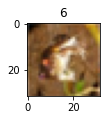

In [48]:
plt.subplot(141)
plt.imshow(image.permute(2,1,0))
plt.title(label)
plt.show()

### 1.2.2. Define Dataloader
define dataloader (dataloader loads data from queue while iters loop)

In [49]:
data_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size = 64,
                                          shuffle=True)

In [50]:
# check how data loader works
print(len(data_loader))
for idx,(images,labels) in enumerate(data_loader):
  if idx==3:
    break
  print(image.size(),labels) # 각각 64개 label

782
torch.Size([3, 32, 32]) tensor([0, 1, 1, 8, 8, 0, 1, 9, 8, 6, 6, 1, 7, 4, 3, 2, 0, 2, 3, 1, 9, 5, 3, 9,
        8, 6, 4, 7, 4, 0, 5, 5, 4, 8, 9, 6, 8, 4, 1, 4, 3, 3, 8, 1, 1, 3, 8, 1,
        1, 1, 9, 4, 0, 4, 7, 5, 1, 4, 2, 9, 5, 2, 7, 7])
torch.Size([3, 32, 32]) tensor([6, 7, 7, 2, 9, 1, 1, 1, 4, 9, 3, 7, 4, 1, 3, 5, 6, 2, 6, 9, 1, 6, 0, 7,
        8, 5, 0, 6, 8, 0, 7, 0, 2, 0, 6, 7, 5, 9, 4, 5, 6, 2, 4, 5, 4, 4, 2, 5,
        8, 8, 6, 6, 8, 2, 1, 8, 8, 8, 4, 7, 0, 3, 7, 6])
torch.Size([3, 32, 32]) tensor([7, 2, 9, 7, 6, 1, 5, 1, 1, 2, 9, 6, 0, 3, 2, 9, 2, 1, 7, 0, 2, 0, 5, 7,
        2, 4, 0, 8, 7, 5, 6, 4, 1, 6, 7, 5, 7, 7, 3, 0, 7, 0, 0, 3, 7, 5, 9, 3,
        1, 2, 9, 5, 7, 0, 5, 3, 1, 2, 3, 4, 1, 3, 8, 8])


### 1.2.3. Define Model

In [51]:
import torch.nn as nn
import torch.nn.functional as F

In [52]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.fc = nn.Linear(6*14*14,10)

  def forward(self,x):
    out = self.layer1(x)
    out = out.reshape(out.size(0),-1)
    out = self.fc(out)

    return out

model = Net()

In [53]:
# check which layers constitute Network
print(model)

Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1176, out_features=10, bias=True)
)


In [55]:
# check how data passes through the Network
data_iter = iter(data_loader)
images, labels = data_iter.next()
outputs = model(images)
print(outputs.size(),'\n',outputs[0],'\n',outputs[0].tolist().index(max(outputs[0])))

torch.Size([64, 10]) 
 tensor([ 0.3675, -0.3137, -0.3097, -0.0124, -0.8218,  0.3976, -0.8984, -0.4265,
        -0.7623,  0.0014], grad_fn=<SelectBackward>) 
 5


### 1.2.4. Set Loss & Optimizer

In [56]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

### 1.2.5. Train/Test

In [58]:
epochs = 1
for epoch in range(epochs):
  for i, (images, labels) in enumerate(data_loader):
    # Forward Propagate
    outputs = model(images)

    #Get Loss, Compute Gradients, Update Parameters
    loss = criterion(outputs, labels) # calculate loss: softmax -> cross entropy loss
    optimizer.zero_grad() # clear gradients w.r.t. parameters
    loss.backward() # getting gradients w.r.t parameters
    optimizer.step() # updating parameters

    if i% 50 == 0 or (i+1) == len(data_loader):
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1,epochs,i+1,len(data_loader),loss.item()))

Epoch [1/1], Step [1/782], Loss: 2.3794
Epoch [1/1], Step [51/782], Loss: 2.2210
Epoch [1/1], Step [101/782], Loss: 2.0592
Epoch [1/1], Step [151/782], Loss: 1.9948
Epoch [1/1], Step [201/782], Loss: 2.0342
Epoch [1/1], Step [251/782], Loss: 2.0277
Epoch [1/1], Step [301/782], Loss: 2.0057
Epoch [1/1], Step [351/782], Loss: 1.8355
Epoch [1/1], Step [401/782], Loss: 1.9506
Epoch [1/1], Step [451/782], Loss: 2.0053
Epoch [1/1], Step [501/782], Loss: 1.7409
Epoch [1/1], Step [551/782], Loss: 1.9402
Epoch [1/1], Step [601/782], Loss: 1.7073
Epoch [1/1], Step [651/782], Loss: 1.8813
Epoch [1/1], Step [701/782], Loss: 1.9432
Epoch [1/1], Step [751/782], Loss: 1.7403
Epoch [1/1], Step [782/782], Loss: 2.1083


### 1.2.5. Save & Visualization

In [59]:
torch.save(model.state_dict(),'my_model.pth')

In [60]:
#check the saved model
! ls


datasets  my_model.pth	sample_data


# 2. XOR in pytorch

In [61]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [63]:
x = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = torch.tensor([0.,1.,1.,0.]).view(-1,1)

In [64]:
class XOR_net(nn.Module):
  def __init__(self):
    super(XOR_net,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
    )

    self.layer2 = nn.Sequential(
        nn.Linear(2,3),
        nn.Sigmoid(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )

  def forward(self,input,num_layer):
    if num_layer == 1:
      out = self.layer1(input)
    elif num_layer == 2:
      out = self.layer2(input)
    else:
      print("out of range")
      raise
    return out

In [65]:
net = XOR_net()

In [66]:
print(net)

XOR_net(
  (layer1): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
  (layer2): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=3, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [68]:
learning_rate = 0.05
epochs = 10000

In [69]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(),lr = learning_rate)

In [70]:
error1, error2 = [],[]

In [71]:
for epoch in range(epochs):
  for i, (input, ans) in enumerate(zip(x,y)):
    output1 = net(input,1)
    output2 = net(input,2)

    loss1 = criterion(output1,ans)
    loss2 = criterion(output2,ans)

    optimizer.zero_grad() # clear gradients w.r.t parameters
    loss1.backward() # getting gradients w.r.t parameters
    loss2.backward()
    optimizer.step() # updating parameters

    error1.append(loss1.detach().numpy())
    error2.append(loss2.detach().numpy())

  if epoch % 500 == 0 or (epoch+1)==epochs:
    print('Epoch [{}/{}] Loss1: {:.4f} Loss2: {:.4f}'.format(epoch+1,epochs,loss1,loss2))

Epoch [1/10000] Loss1: 0.9161 Loss2: 0.7913
Epoch [501/10000] Loss1: 0.7050 Loss2: 0.7187
Epoch [1001/10000] Loss1: 0.7059 Loss2: 0.7133
Epoch [1501/10000] Loss1: 0.7059 Loss2: 0.6874
Epoch [2001/10000] Loss1: 0.7059 Loss2: 0.6371
Epoch [2501/10000] Loss1: 0.7059 Loss2: 0.6874
Epoch [3001/10000] Loss1: 0.7059 Loss2: 0.4890
Epoch [3501/10000] Loss1: 0.7059 Loss2: 0.1512
Epoch [4001/10000] Loss1: 0.7059 Loss2: 0.0811
Epoch [4501/10000] Loss1: 0.7059 Loss2: 0.0546
Epoch [5001/10000] Loss1: 0.7059 Loss2: 0.0408
Epoch [5501/10000] Loss1: 0.7059 Loss2: 0.0325
Epoch [6001/10000] Loss1: 0.7059 Loss2: 0.0270
Epoch [6501/10000] Loss1: 0.7059 Loss2: 0.0230
Epoch [7001/10000] Loss1: 0.7059 Loss2: 0.0200
Epoch [7501/10000] Loss1: 0.7059 Loss2: 0.0178
Epoch [8001/10000] Loss1: 0.7059 Loss2: 0.0159
Epoch [8501/10000] Loss1: 0.7059 Loss2: 0.0144
Epoch [9001/10000] Loss1: 0.7059 Loss2: 0.0132
Epoch [9501/10000] Loss1: 0.7059 Loss2: 0.0122
Epoch [10000/10000] Loss1: 0.7059 Loss2: 0.0113


In [72]:
for input, target in zip(x,y):
  output1 = net(input,1)
  output2 = net(input,2)
  print("input: ", input, "layer1: ",output1.data,"\tlayer2: ",output2.data,"\tanswer:",target)

input:  tensor([0., 0.]) layer1:  tensor([0.5063]) 	layer2:  tensor([0.0014]) 	answer: tensor([0.])
input:  tensor([0., 1.]) layer1:  tensor([0.5000]) 	layer2:  tensor([0.9915]) 	answer: tensor([1.])
input:  tensor([1., 0.]) layer1:  tensor([0.4937]) 	layer2:  tensor([0.9933]) 	answer: tensor([1.])
input:  tensor([1., 1.]) layer1:  tensor([0.4873]) 	layer2:  tensor([0.0112]) 	answer: tensor([0.])


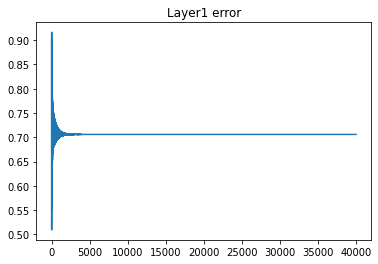

In [73]:
plt.plot(error1)
plt.title("Layer1 error")
plt.show()

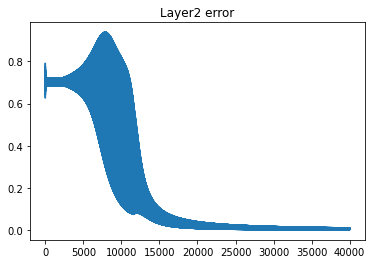

In [74]:
plt.plot(error2)
plt.title("Layer2 error")
plt.show()